In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io as sio
import os
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import svm
from sklearn.externals import joblib

In [81]:
# Block for re-loading my libraries if I make updates
import imp 
imp.reload(ief) 
imp.reload(dg) 

<module 'dgFuncs' from '/Users/davidgroppe/PycharmProjects/DG_LIBRARY/dgFuncs.py'>

In [2]:
perf=np.load('classification_metrics3xval.npz')

In [24]:
np.arange(0.01,1.02,.2)

array([ 0.01,  0.21,  0.41,  0.61,  0.81,  1.01])

In [26]:
try_C=np.arange(0.01,1.02,.2)
for ct, C in enumerate(try_C):
    print(C)

0.01
0.21
0.41
0.61
0.81
1.01


In [20]:
print('# of patients=%d' % len(perf['train_subs_list']))
print('Training Data')
mn, ci_low, ci_hi=dg.mean_and_cis(perf['train_sens'])
print('Mean (0.95 CI) Sensitivity %.3f (%.3f-%.3f)' % (mn,ci_low,ci_hi))
mn, ci_low, ci_hi=dg.mean_and_cis(perf['train_spec'])
print('Mean (0.95 CI) Specificity %.3f (%.3f-%.3f)' % (mn,ci_low,ci_hi))

# print('Mean (0.95 CI) Sensitivty %.3f (%.3f)' % (np.mean(perf['train_sens']),)
print('Validation Data')
mn, ci_low, ci_hi=dg.mean_and_cis(perf['valid_sens'])
print('Mean (0.95 CI) Sensitivity %.3f (%.3f-%.3f)' % (mn,ci_low,ci_hi))
mn, ci_low, ci_hi=dg.mean_and_cis(perf['valid_spec'])
print('Mean (0.95 CI) Specificity %.3f (%.3f-%.3f)' % (mn,ci_low,ci_hi))

# of patients=8
Training Data
Mean (0.95 CI) Sensitivity 0.975 (0.973-0.977)
Mean (0.95 CI) Specificity 0.976 (0.976-0.976)
Validation Data
Mean (0.95 CI) Sensitivity 0.025 (-0.009-0.058)
Mean (0.95 CI) Specificity 0.945 (0.896-0.994)


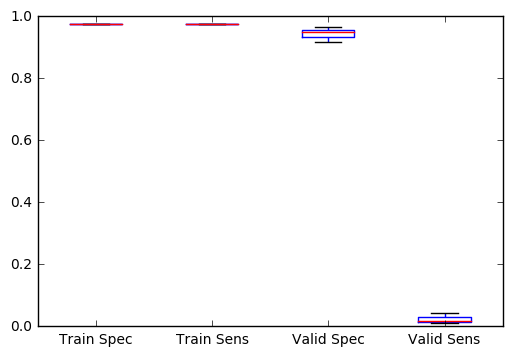

In [9]:
_=plt.boxplot((perf['train_spec'],perf['train_sens'],perf['valid_spec'],perf['valid_sens']))
_=plt.xticks(np.arange(1,5),['Train Spec','Train Sens','Valid Spec','Valid Sens'])

In [72]:
# Load results
perf=np.load('classification_metrics_grid.npz')

# Get xtick labels
str(perf['try_C'])
xlabs=list()
for c in perf['try_C']:
    xlabs.append(str(c))
print(xlabs)

['0.01', '0.21', '0.41', '0.61', '0.81', '1.01']


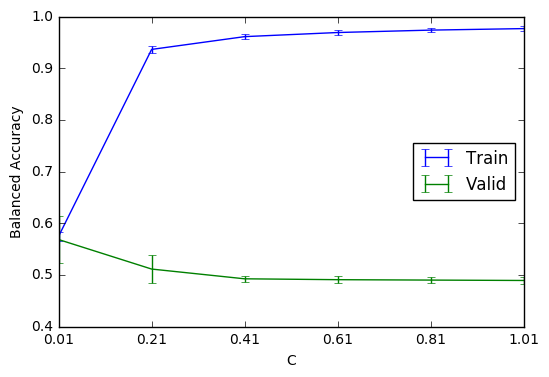

In [73]:
# Balanced Accuracy
dat=perf['train_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
plt.ylabel('Balanced Accuracy')
plt.xlabel('C')
#plt.xticks(np.arange(len(perf['try_C'])),label=xlabs)
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
# plt.xtick(np.arange(len(perf['try_C'])),label=xlabs)
plt.legend(loc='right')

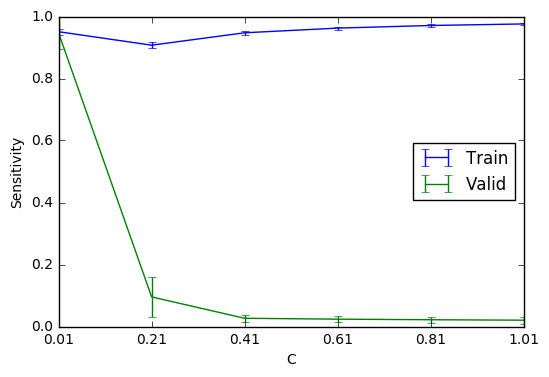

In [74]:
# Sensitivity
dat=perf['train_sens']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_sens']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
plt.ylabel('Sensitivity')
plt.xlabel('C')
#plt.xticks(np.arange(len(perf['try_C'])),label=xlabs)
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
# plt.xtick(np.arange(len(perf['try_C'])),label=xlabs)
plt.legend(loc='right')

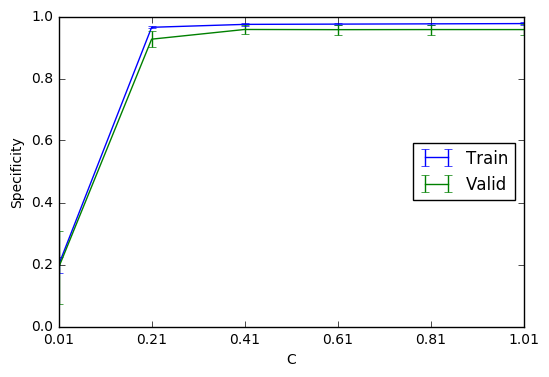

In [75]:
# Specificity
dat=perf['train_spec']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_spec']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
plt.ylabel('Specificity')
plt.xlabel('C')
#plt.xticks(np.arange(len(perf['try_C'])),label=xlabs)
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
# plt.xtick(np.arange(len(perf['try_C'])),label=xlabs)
plt.legend(loc='right')

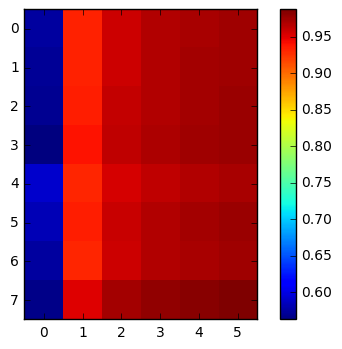

In [46]:
_=plt.imshow(perf['train_bal_acc'],interpolation='nearest')
_=plt.colorbar()

In [78]:
import scipy.stats

In [79]:
scipy.stats.kurtosis(np.zeros((1,10)))

array([-3., -3., -3., -3., -3., -3., -3., -3., -3., -3.])

In [80]:
scipy.stats.skew?